In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [26]:
def initialize():
    g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
    for node in g.nodes:
        g.nodes[node]['visits'] = 0
    
    num_visits = 0
    #starting the surfer at a radom node:
    num_visits +=1
    nodes_list = list(g.nodes())
    surfer_node = random.choice(nodes_list)
    g.nodes[surfer_node]['visits'] += 1
    return g, num_visits, surfer_node
    
def simulation_step(g, num_visits, surfer_node,alpha = 0.85):
    
    # move the surfer to a random nieghor with a probability alpha:
    if random.random() <= alpha:
        num_visits +=1
        if list(g.neighbors(surfer_node)): 
            surfer_node = random.choice(list(g.neighbors(surfer_node)))
            g.nodes[surfer_node]['visits'] += 1
        else: #if there are no neighbors, move to a ranom node
            surfer_node = random.choice(list(g.nodes()))
            g.nodes[surfer_node]['visits'] += 1
    # move the node randomly with probability 1-alpha
    if random.random() < (1-alpha):
        num_visits +=1
        surfer_node = random.choice(list(g.nodes()))
        g.nodes[surfer_node]['visits'] += 1
    return g, num_visits

In [27]:
g, num_visits, surfer_node = initialize()
error = []
N  = 10000
for i in range(N):
    g, num_visits = simulation_step(g, num_visits, surfer_node)
    average_abs_error = np.mean(abs(np.array([val for val in nx.pagerank(g).values()]) - \
                                    np.array([i['visits'] for i in dict(g.nodes).values()])/num_visits))
    
    error.append(average_abs_error)

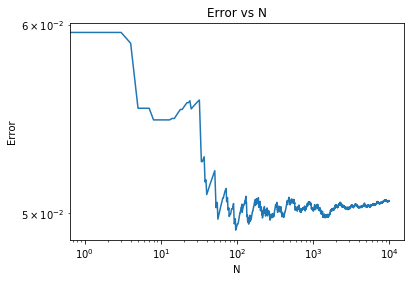

In [29]:
plt.loglog([i for i in range(N)], error)
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Error vs N")
plt.show()

In [6]:
# over time, the error decreases.

C:\Users\gaber\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\gaber\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


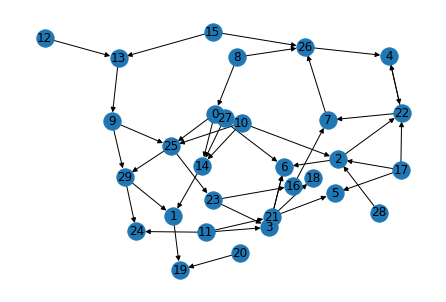

In [7]:
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels=True)